In [1]:
!pip install xgboost
!pip install nltk
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn==1.0.2
!pip install scipy
!pip install lightgbm
!pip install hyperopt
# !pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import warnings
warnings.filterwarnings('ignore')

import random, re, time, xgboost, glob, os, nltk, string
import numpy as np
from numpy.linalg import svd
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
# from matplotlib import rc
# rc('font', family='Malgun Gothic')      #한글 폰트설정
# plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

from scipy import stats, sparse
from scipy.stats import t, norm, chi2, chi2_contingency, skew
# from sklearn.datasets import load_iris, make_classification, load_breast_cancer, load_boston, make_blobs, fetch_20newsgroups
from sklearn import datasets, tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Binarizer, PolynomialFeatures

from sklearn.metrics import accuracy_score, precision_score, \
    recall_score, confusion_matrix, f1_score, classification_report,\
    precision_recall_curve, roc_auc_score, mean_squared_error, r2_score,\
    mean_absolute_error, silhouette_samples, silhouette_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, \
    GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from xgboost import plot_importance, XGBClassifier, XGBRegressor

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

# from surprise import SVD, Dataset, accuracy
# from surprise.model_selection import train_test_split

from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, imdb, reuters
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory

## **합성곱 신경망 소개**
(혼공 p437 참조)


**합성곱 신경망(Convolutional Neural Networks, CNN)**은 이미지나 비디오 등의 공간적 구조를 가진 데이터를 처리하는 데 유용한 딥러닝 모델

- 입력 레이어: 원시 이미지 데이터를 받아들이는 첫 번째 레이어. 이미지는 보통 높이, 너비, 그리고 색상 채널(예: RGB)의 3차원 텐서로 표현.

- 합성곱 레이어(Convolutional Layer): 이 레이어는 이미지의 지역적 특성을 학습. 이 레이어에서는 "필터" 또는 "커널"이라는 작은 윈도우가 이미지를 스캔하며 이동. 각 필터는 고유한 특징(예: 가장자리, 텍스처 등)을 인식.

- 필터/커널: 합성곱 층에서 사용되는 작은 행렬로, 랜덤한 값으로 초기화된 후에 데이터를 통해 학습. 필터는 이미지의 여러 부분을 스캔하며 특정 특징을 인식.

- 스트라이드: 필터가 이미지 위를 이동하는 간격. 스트라이드 값에 따라 출력 피쳐 맵의 크기가 결정되며 큰 스트라이드는 작은 출력 차원을 생성하고, 작은 스트라이드는 큰 출력 차원을 생성.

- 패딩: 입력 이미지의 주위에 픽셀을 추가하는 방법으로, 합성곱이 적용된 후의 출력 크기를 조절할 수 있다. 패딩이 없으면 합성곱 연산을 거치면서 출력 이미지의 크기가 작아진다. 패딩을 사용하면 이를 방지하고 원본 이미지의 공간적 크기를 보존할 수 있다.

- 활성화 함수: 일반적으로 ReLU(Rectified Linear Unit) 같은 비선형 활성화 함수가 사용되어 복잡한 패턴을 학습할 수 있도록 한다.

- 풀링 레이어(Pooling Layer): 이 레이어는 출력을 다운샘플링하여 모델의 복잡도를 줄이고, 과적합을 방지하며, 일부 공간적 인식력을 보존. 가장 많이 사용되는 풀링 방법은 최대 풀링(Max Pooling)이다.

- 완전 연결 레이어(Fully Connected Layer): 이 레이어는 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있다. 이는 일반적으로 신경망의 마지막 단계에서 사용되며, 합성곱 및 풀링 레이어를 통해 학습된 고차원 특징을 이용하여 최종적으로 분류나 회귀 등의 작업을 수행.
  - 이미지=공간정보
  - 지역정보(필터를 통해 잡아낸 특징들/로우 수준 특징)가 집약돼서 특성에 관한 더 추상적인 정보를 만들어내면 고차원특성이 됨(?)

- 이러한 각 요소들이 어떻게 함께 작동하는지 간단하게 설명하면, 합성곱 레이어의 필터는 입력 이미지를 스캔하면서 지역적인 특징을 감지하고, 이 정보를 활성화 맵(특징 맵)의 형태로 출력. 이때, 스트라이드와 패딩은 필터가 이미지를 어떻게 스캔할지를 결정하며, 활성화 함수는 비선형성을 추가하여 복잡한 패턴을 학습하게 해준다. 그 다음, 풀링 레이어는 이 특징 맵을 다운샘플링하여 모델의 복잡도를 줄이고, 공간적 인식력을 보존하며, 과적합을 방지한다. 마지막으로, 완전 연결 레이어는 이런 모든 특징들을 종합하여 최종적으로 이미지의 클래스를 예측하거나, 객체의 위치를 회귀하는 등의 작업을 수행한다.
이런 식으로, CNN은 각 레이어에서 이미지의 다양한 특징을 학습하고, 이 정보를 바탕으로 복잡한 패턴을 인식하고, 효과적인 예측을 수행하게 됩니다.

- 2D 합성곱 (Conv2D): 이는 가장 흔히 사용되는 합성곱 유형으로, 이미지 같은 2차원 데이터에 적용. Conv2D는 입력 데이터의 지역적 특징을 인식하고 이를 학습하는 데 사용.

- 1D 합성곱 (Conv1D): 이 유형의 합성곱은 시퀀스 데이터(예: 시계열 데이터, 텍스트 데이터)를 처리하는 데 주로 사용. 이는 입력 시퀀스의 연속적인 부분을 고려하므로, 특히 시간적인 순서 정보가 중요한 문제에 유용.

#### **간단한 컨브넷 만들기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)   #텐서를 1차원으로 평탄화 -> 모든 픽셀값들을 연속적인 벡터 형태로 변환

outputs = layers.Dense(10, activation="softmax")(x)   # 출력(완전연결) 레이어: 10개 뉴런, 각 뉴런은 이미지가 특정 클래스에 속할 확률을 출력

model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

- **MNIST 데이터셋**

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 16s 4ms/step - loss: 0.1598 - accuracy: 0.9498
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0312 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0231 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0178 - accuracy: 0.9946


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 손실: {test_loss:.3f}")
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9910
테스트 손실: 0.031
테스트 정확도: 0.991


## **CNN모델(컨브넷)**

- **MNIST 데이터셋**

In [7]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 개인 데이터는 사이킷런 train_test_split으로 학습/검증 나누기

input_shape = (img_rows, img_cols, 1)   # 28x28 픽셀, 컬러=그레이스케일
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  #CNN에 맞게 바꿈
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.  #픽셀값을 255로 나눠 0~1사이로 정규화
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128   #한 번에 모델이 처리하는 이미지 수
num_classes = 10   #클래스 개수(0~9숫자)
epochs = 12  #전체 훈련데이터를 몇 번 반복 학습할지

#원핫 인코딩
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()  #레이어를 순차적으로 쌓아 구성하는 방식

# 합성곱 레이어 추가: 32개의 필터, 필터(커널) 사이즈 5x5 픽셀,
# 스트라이드 1x1(필터가 한번에 얼마나 이동할지), 패딩 same, relu함수, 입력 형태 지정
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
# 풀링 레이어 추가(입력 크기를 절반으로 줄여주는 역할), 풀링윈도우(필터) 사이즈 2x2
# 윈도우 내의 값 중 최대값을 선택해 출력 -> 작은 특징들이 손실될 수 있음
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# 합성곱 레이어 추가: 64개 필터(필터가 많을수록 더 다양한 특징 학습)
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
# 풀링 레이어 추가
model.add(MaxPooling2D(pool_size=(2, 2)))
# 드롭아웃 레이어 추가(25% 확률로 입력 유닛을 무작위 제외 -> 과적합 방지)
model.add(Dropout(0.25))
# 플래튼 레이어 추가(다차원 입력을 일차원으로 펼침)
# 합성곱/풀링 레이어 이후엔 다차원 텐서 데이터가 생성됨 -> Dense레이어 전에 플래튼 레이어로 펼쳐줌
model.add(Flatten())
# 연결 레이어 추가, 1000개 유닛(Dense = Fully Connected 레이어)
model.add(Dense(1000, activation='relu'))
# 드롭아웃 레이어 추가(50% 확률로 입력 유닛을 무작위 제외)
model.add(Dropout(0.5))
# 출력 레이어 추가, 클래스 개수=유닛 수, softmax(클래스별 확률 분포 출력)
model.add(Dense(num_classes, activation='softmax'))

model.summary()   #모델 구조와 파라미터 출력

model.compile(loss='categorical_crossentropy', optimizer='adam',  #adam: 경사하강법 기반(Momentum+RMSprop)
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size,
              epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                 

313/313 [==============================] - 1s 1ms/step


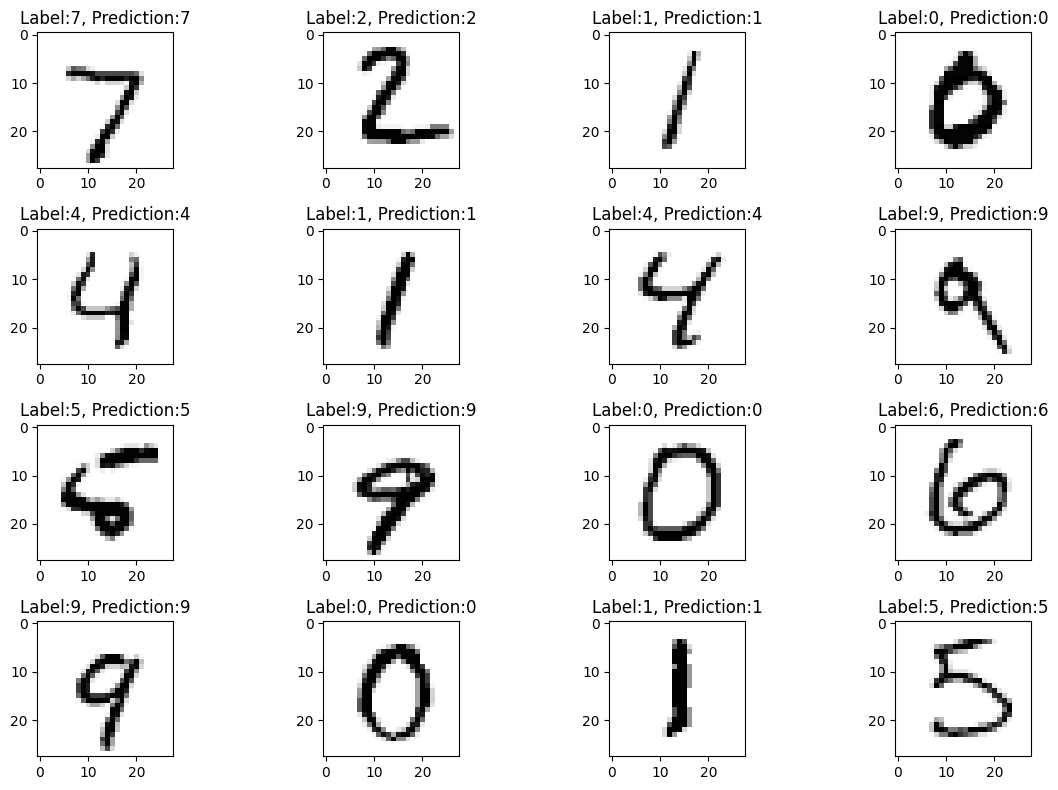

In [8]:
predicted_result = model.predict(x_test)   #각각의 이미지에 대한 클래스별 예측 확률값
predicted_labels = np.argmax(predicted_result, axis=1)
# np.argmax: 배열에서 가장 큰 값의 인덱스 반환(예측 확률이 가장 높은 클래스로)

test_labels = np.argmax(y_test, axis=1)
# 실제 어느 클래스 거였는지(원핫 인코딩 돼 있음)

count = 0

plt.figure(figsize=(12,8))
for n in range(16):   #16개 이미지 출력할거임
    count += 1
    plt.subplot(4, 4, count)   # 4장씩 4줄 출력
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()


In [9]:
predicted_result[0].max()

1.0

In [10]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

- **고양이-강아지 데이터셋(소규모 데이터셋)**

In [ ]:
# #구글에서 데이터셋 가져와서 다운받기
# import gdown
# gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

# !unzip -qq dogs-vs-cats.zip # qq' 옵션은 'quiet' 모드로 unzip 명령어가 해제 과정의 세부 정보를 출력하지 않습니다.
# !unzip -qq train.zip

# make_subset("train", start_index=0, end_index=1000)
# make_subset("validation", start_index=1000, end_index=1500)
# make_subset("test", start_index=1500, end_index=2500)

In [11]:
# 캐글 데이터셋 코랩에서 다운받기 (캐글에서 API 다운받아서 파일선택에 넣기)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lliliiilillilil","key":"9cea57c658a9e40f39c22c37e36eed2d"}'}

In [12]:
!mkdir -p ~/.kaggle   #~/.kaggle 폴더 만들기
!cp kaggle.json ~/.kaggle/   #키 파일을 이 폴더로 복사
!chmod 600 ~/.kaggle/kaggle.json   #현재 사용자만 이 파일을 읽을 수 있도록 함

os.path.exists('/root/.kaggle')    #디렉토리가 잘 만들어졌는지 확인

True

In [13]:
# 데이터셋 내려받기(403 에러 -> 해당 데이터셋 rules 페이지 가서 동의 버튼 누르고 오기)
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:28<00:00, 31.4MB/s]
100% 812M/812M [00:28<00:00, 29.9MB/s]


In [14]:
# 압축해제
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [15]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")    #원본 데이터셋이 압축 해제되어 있는 디렉토리 경로
new_base_dir = pathlib.Path("cats_vs_dogs_small")   #서브셋 데이터를 저장할 디렉토리

def make_subset(subset_name, start_index, end_index):   #서브 디렉토리 생성
    for c in ("cat", "dog"):
        dir = new_base_dir / subset_name / c   #train/validation/test 아래에 강아지/고양이 경로 생성

        if os.path.exists(dir):
          shutil.rmtree(dir)  # 기존 디렉토리 존재할 경우 삭제

        os.makedirs(dir)   #서브 디렉토리 만들기
        fnames = [f"{c}.{i}.jpg" for i in range(start_index, end_index)]   #해당 서브셋에 들어갈 파일명 리스트
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)   #새로운 디렉토리로 파일 복사

# cats_vs_dogs_small 아래에 train, validation, test 3개의 서브 디렉토리로 생성
make_subset("train", start_index=0, end_index=1000)   # 학습용(고양이, 강아지 각각 1000장씩)
make_subset("validation", start_index=1000, end_index=1500)   # 1차 검증용(각각 500장)
make_subset("test", start_index=1500, end_index=2500)   # 최종 검증용(각각 1000장)

In [16]:
inputs = keras.Input(shape=(180, 180, 3))   #180*180, 컬러이미지

x = layers.Rescaling(1./255)(inputs)   #입력 이미지 픽셀값을 255로 나눠서 정규화
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)   #필터 개수, 필터(커널) 사이즈
x = layers.MaxPooling2D(pool_size=2)(x)   #풀링 레이어: 영역내 가장 큰 값만 선택해 연산
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)  #플래튼 레이어: 다차원을 일차원으로

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [18]:
model.compile(loss="binary_crossentropy",   #이진분류에서 사용하는 손실함수
              optimizer="rmsprop",   #경사하강법 알고리즘의 변형
              metrics=["accuracy"])

In [19]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir/"train",    # cats_vs_dogs_small/train 디렉토리
    image_size=(180, 180), batch_size=32)   #입력 이미지 사이즈, 배치(한 번에 모델에 입력되는 샘플 수)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_dataset:   #반환된 데이터셋의 데이터, 레이블 크기 확인
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


#### **유용한 메서드**
- shuffle(buffer_size): 버퍼 안의 원소를 섞음
- prefetch(buffer_size): 장치 활용도를 높이기 위해 GPU 메모리에 로드할 데이터를 미리 준비함
- **map(callable)**: 변환을 데이터셋의 각 원소에 적용

In [21]:
callbacks = [keras.callbacks.ModelCheckpoint(   #모델 훈련 중 모델의 상태 저장
        filepath="convnet_from_scratch.keras",   #모델 가중치와 구조를 저장할 경로
        save_best_only=True,   #검증 손실이 최적값으로 갱신될 때만 모델 저장
        monitor="val_loss")]   #모니터링 할 검증값(손실)

history = model.fit(
    train_dataset,   #훈련셋
    epochs=30, validation_data=validation_dataset,   #에포크, 검증셋
    callbacks=callbacks)   #훈련 중 모델 상태를 모니터링 할 콜백 함수 리스트

Epoch 1/30
63/63 [==============================] - 7s 60ms/step - loss: 0.6942 - accuracy: 0.4805 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 3s 47ms/step - loss: 0.6957 - accuracy: 0.5335 - val_loss: 0.6937 - val_accuracy: 0.5030
Epoch 3/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6924 - accuracy: 0.5250 - val_loss: 0.6828 - val_accuracy: 0.5930
Epoch 4/30
63/63 [==============================] - 3s 46ms/step - loss: 0.6808 - accuracy: 0.5850 - val_loss: 0.6762 - val_accuracy: 0.5330
Epoch 5/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6570 - accuracy: 0.6290 - val_loss: 0.6259 - val_accuracy: 0.6500
Epoch 6/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6010 - accuracy: 0.6820 - val_loss: 0.6388 - val_accuracy: 0.6810
Epoch 7/30
63/63 [==============================] - 3s 45ms/step - loss: 0.5711 - accuracy: 0.7100 - val_loss: 0.6450 - val_accuracy: 0.6060
Epoch 8/30
63

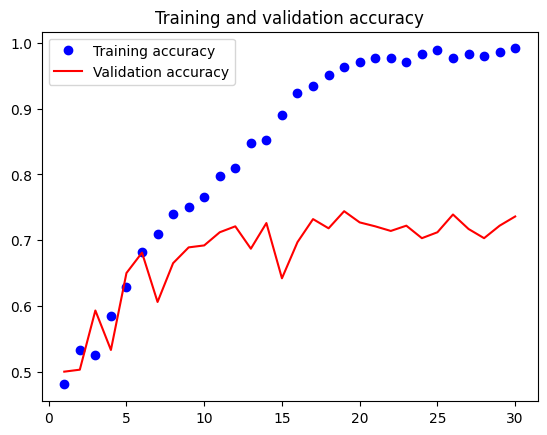

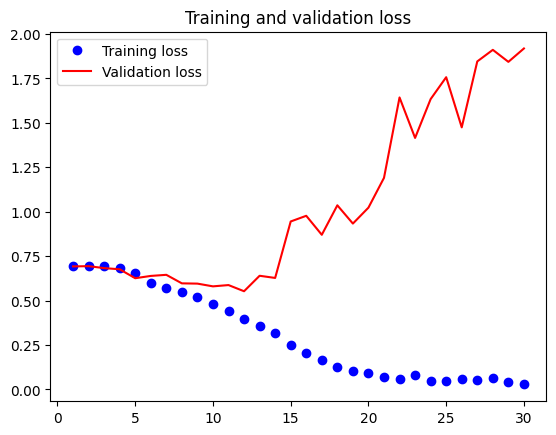

In [22]:
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)   # x축으로 사용

# 에폭에 따른 정확도(학습/검증 그래프 비교)
# 학습 정확도는 계속 올라가는 반면 검증 10 이후로 정체 -> 이 이후는 학습 데이터 과적합되고 있을 가능성
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(); plt.figure()

# 에폭에 따른 손실(학습/검증 그래프 비교)
# 학습 손실은 계속 내려가는 반면 검증 손실이 계속 커짐 -> 두 손실이 모두 작은 지점인 10 정도가 좋음
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend(); plt.show()

In [23]:
# 테스트 세트에서 모델 평가
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)

print(f"테스트 손실: {test_loss:.3f}")
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 18ms/step - loss: 0.5635 - accuracy: 0.7260
테스트 손실: 0.563
테스트 정확도: 0.726


### **여기서 부터 데이터 증식**

In [24]:
# Sequential 모델: 이미지 증강 과정
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"),   #이미지 무작위 뒤집기(수평horizontal 방향)
      layers.RandomRotation(0.1),    #무작위 회전(0.1라디안 = 약 5.7도)
      layers.RandomZoom(0.2),    #무작위 확대/축소(최대 20%까지)
      layers.RandomBrightness(0.3),
    ]  )

- layers.RandomFlip("horizontal"): 이미지를 수평으로 무작위로 뒤집기
- layers.RandomFlip("vertical"): 이미지를 수직으로 무작위로 뒤집기
- layers.RandomRotation(angle): 이미지 무작위로 회전(angle = 회전 최대 각도 지정)
- layers.RandomZoom(scale): 이미지를 무작위로 확대 또는 축소(scale = 최대+최소 확대/축소 비율)
- layers.RandomContrast(factor): 이미지 대비 무작위 조정(factor = 강도 지정)
- layers.RandomBrightness(factor): 이미지 밝기 무작위로 조정(factor = 강도 지정)
- layers.RandomSaturation(factor): 이미지 채도 무작위로 조정(factor = 강도 지정)
- layers.GaussianNoise(stddev): 이미지에 가우시안 잡음 추가(stddev = 잡음의 표준 편차)
- layers.GaussianBlur(radius): 이미지에 가우시안 블러 적용(radius = 블러의 반경)
- layers.RandomHue(max_delta): 이미지 색조 무작위로 조정(max_delta = 색조 변경 최대 범위)

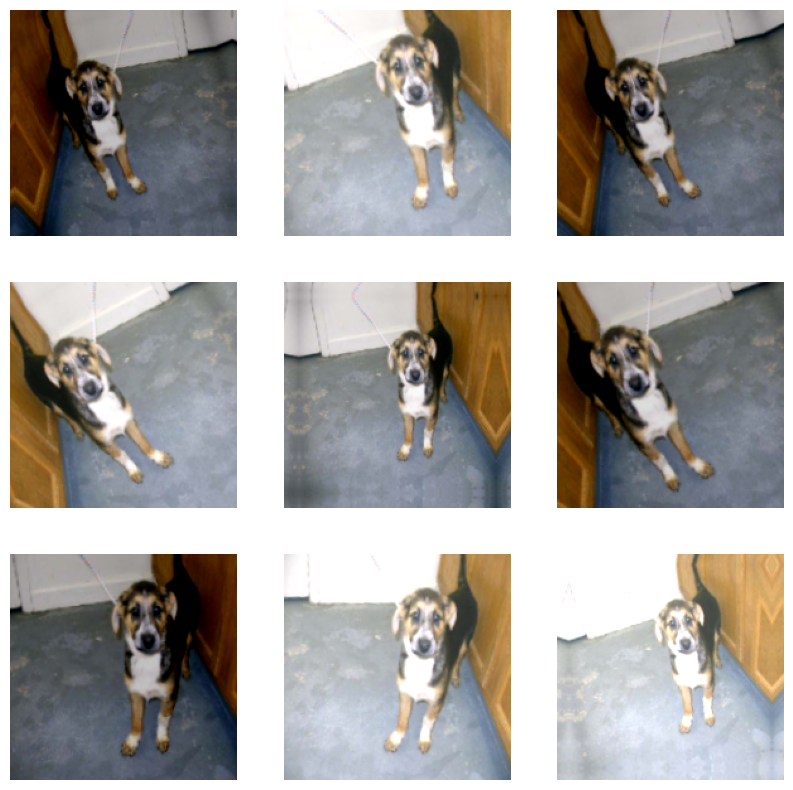

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):    #train_dataset.take(1): 1번 배치(세트) -> 32장의 이미지가 한 세트(for문 1번만 돌음)
    for i in range(9):   #배치 세트(32장 이미지) 9회 증강
        img = data_augmentation(images)   #이미지 증강(변형) 사용자 함수

        # 이미지 변형 예시 시각화
        ax = plt.subplot(3, 3, i + 1)   #행/ 열/ 현재 서브플롯의 위치
        plt.imshow(img[0].numpy().astype("uint8"))   # 배치세트 중 0번 이미지에 대해 시각화
        #imshow 함수는 인자를 배열 형식으로 받음/ imshow 함수는 이미지 데이터를 unit8 형식으로 예상함
        plt.axis("off")

In [26]:
# CNN 모델
inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)    #이미지 증강(변형) Sequential 모델
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [27]:
callbacks = [     #콜백 리스트
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",   #경로 지정
        save_best_only=True,   #손실이 최적일 때만 체크포인트 저장
        monitor="val_loss") ]  #손실함수 지정

history = model.fit(
    train_dataset, epochs=100,
    validation_data=validation_dataset,
    callbacks = callbacks)

Epoch 1/100
63/63 [==============================] - 6s 55ms/step - loss: 0.6953 - accuracy: 0.5135 - val_loss: 0.6928 - val_accuracy: 0.5030
Epoch 2/100
63/63 [==============================] - 3s 49ms/step - loss: 0.6961 - accuracy: 0.5065 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 3s 49ms/step - loss: 0.6935 - accuracy: 0.5265 - val_loss: 0.6910 - val_accuracy: 0.5230
Epoch 4/100
63/63 [==============================] - 3s 49ms/step - loss: 0.6874 - accuracy: 0.5520 - val_loss: 0.6839 - val_accuracy: 0.5390
Epoch 5/100
63/63 [==============================] - 3s 51ms/step - loss: 0.6864 - accuracy: 0.5825 - val_loss: 0.7057 - val_accuracy: 0.5260
Epoch 6/100
63/63 [==============================] - 3s 48ms/step - loss: 0.6582 - accuracy: 0.6255 - val_loss: 0.6851 - val_accuracy: 0.5650
Epoch 7/100
63/63 [==============================] - 3s 48ms/step - loss: 0.6586 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6400
Epoch 

In [28]:
# 테스트 세트에서 모델 평가(이미지 증식 후)
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 손실: {test_loss:.3f}")
print(f"테스트 정확도: {test_acc:.3f}")

# 이미지 증식 전: 손실(0.556), 정확도(0.720)

63/63 [==============================] - 2s 22ms/step - loss: 0.3925 - accuracy: 0.8510
테스트 손실: 0.393
테스트 정확도: 0.851


### **사전 훈련된 모델을 사용한 특성 추출**
- **VGG16(CNN아키텍처) 합성곱 기반 층 만들기**

In [29]:
# VGG16: 심층 합성곱 신경망(Convolutional Neural Network, CNN) 아키텍처
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",   # VGG16 모델의 초기 가중치 설정(ImageNet 데이터셋에서 사전 훈련된 가중치를 사용)
    include_top=False,   #모델 상단의 완전연결 계층을 포함할지 여부(합성곱 계층만 포함할수도)
    input_shape=(180, 180, 3))  #입력 이미지 크기

58889256/58889256 [==============================] - 3s 0us/step


In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### **데이터 증식을 사용하지 않는 빠른 특성 추출**
- **VGG16 특성과 해당 레이블 추출하기**

In [31]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [32]:
train_features.shape

(2000, 5, 5, 512)

**밀집 연결 분류기 정의하고 훈련하기**

In [33]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",   #모델 가중치를 저장할 파일의 이름
        save_best_only=True,
        monitor="val_loss") ]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data = (val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 16.3326 - accuracy: 0.9275 - val_loss: 3.8390 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 5.1927 - accuracy: 0.9705 - val_loss: 5.1382 - val_accuracy: 0.9640
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 1.6821 - accuracy: 0.9840 - val_loss: 4.3775 - val_accuracy: 0.9740
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.9657 - accuracy: 0.9880 - val_loss: 5.0996 - val_accuracy: 0.9660
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0931 - accuracy: 0.9890 - val_loss: 5.8436 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.9955 - val_loss: 5.0469 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7785 - accuracy: 0.9940 - val_loss: 6.4531 - val_accuracy: 0.9740
Epoch 8/20
63/63 [=

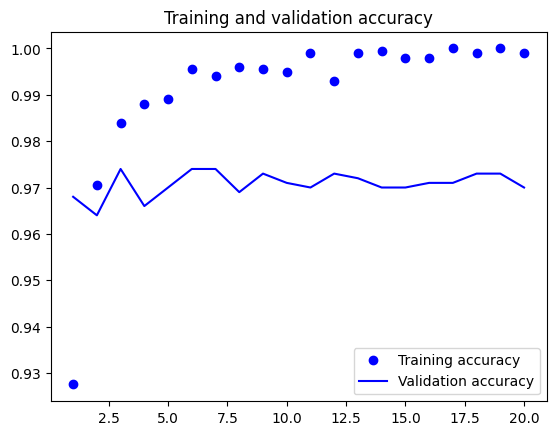

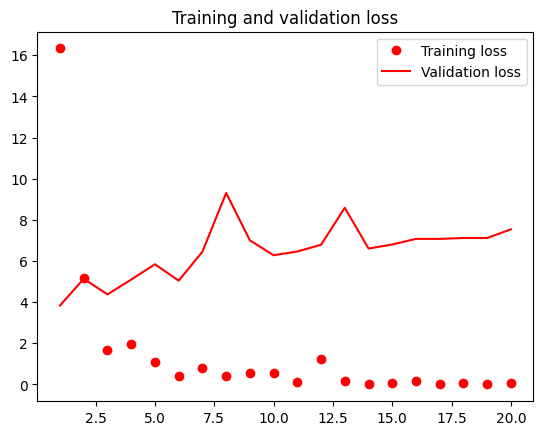

In [36]:
# 결과 그래프 그리기
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)  # X축

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(); plt.figure()

plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend(); plt.show()

In [37]:
test_model = keras.models.load_model("feature_extraction.keras")   #콜백 함수에서 모델 가중치 저장해뒀던 파일

test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")
print(f"테스트 손실: {test_loss:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 4.4835 - accuracy: 0.9665
테스트 정확도: 0.966
테스트 손실: 4.483


### **데이터 증식을 사용한 빠른 특성 추출**
- **VGG16 합성곱 기반 층을 만들고 동결하기**

In [38]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ])

In [39]:
conv_base = keras.applications.vgg16.VGG16 (
    weights='imagenet',
    include_top=False)

conv_base.trainable = False   # 합성곱 기반 층들의 가중치를 동결함(False)

# 사전 훈련된 가중치를 고정시켜 이후에 추가된 층만 훈련되도록 함
# 따라서, VGG16의 합성곱 기반 층들(이미지 특성 추출에 탁월함)은 역전파 과정에서 가중치가 업데이트 되지x
# 사전훈련 모델의 가중치를 동결하고, 새 데이터셋에 맞는 추가 층들을 훈련시킴으로써 적은 데이터로도 효과적인 모델 구현 가능

- **동결하기 전에 훈련 가능한 가중치 리스트를 출력하기**

In [40]:
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26
합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수: 0


- **데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기**

In [41]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [42]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 11s 151ms/step - loss: 18.0558 - accuracy: 0.8960 - val_loss: 4.2653 - val_accuracy: 0.9660
Epoch 2/50
63/63 [==============================] - 9s 146ms/step - loss: 6.1370 - accuracy: 0.9485 - val_loss: 14.9387 - val_accuracy: 0.9280
Epoch 3/50
63/63 [==============================] - 10s 149ms/step - loss: 7.2835 - accuracy: 0.9530 - val_loss: 5.3400 - val_accuracy: 0.9720
Epoch 4/50
63/63 [==============================] - 10s 155ms/step - loss: 5.3864 - accuracy: 0.9600 - val_loss: 4.3435 - val_accuracy: 0.9710
Epoch 5/50
63/63 [==============================] - 10s 159ms/step - loss: 4.4421 - accuracy: 0.9655 - val_loss: 4.4226 - val_accuracy: 0.9720
Epoch 6/50
63/63 [==============================] - 10s 159ms/step - loss: 3.9632 - accuracy: 0.9665 - val_loss: 6.1010 - val_accuracy: 0.9680
Epoch 7/50
63/63 [==============================] - 10s 153ms/step - loss: 2.8080 - accuracy: 0.9770 - val_loss: 5.7622 - val_accuracy: 0.967

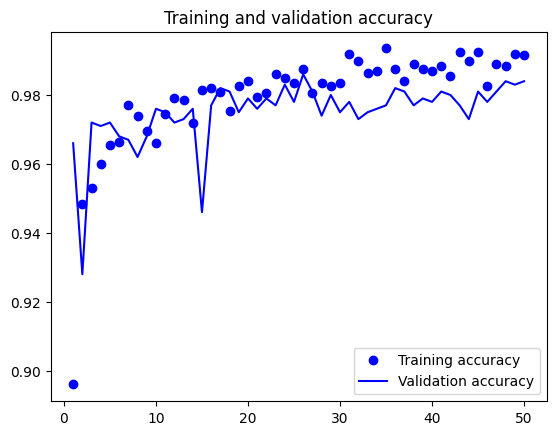

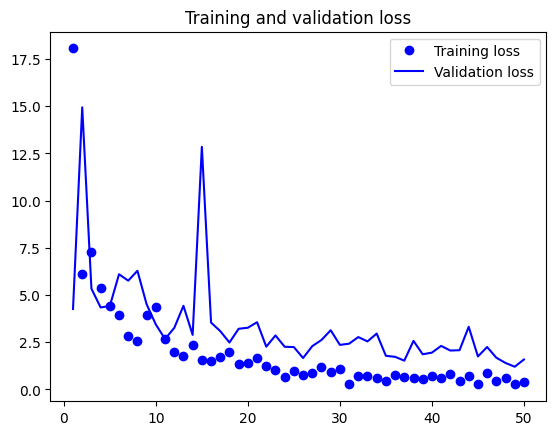

In [43]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [44]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 7s 99ms/step - loss: 2.1776 - accuracy: 0.9745
테스트 정확도: 0.975


In [45]:

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [46]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [47]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 183ms/step - loss: 0.4568 - accuracy: 0.9890 - val_loss: 1.5040 - val_accuracy: 0.9800
Epoch 2/30
63/63 [==============================] - 11s 179ms/step - loss: 0.4617 - accuracy: 0.9865 - val_loss: 1.1481 - val_accuracy: 0.9800
Epoch 3/30
63/63 [==============================] - 11s 174ms/step - loss: 0.3612 - accuracy: 0.9895 - val_loss: 1.1114 - val_accuracy: 0.9790
Epoch 4/30
63/63 [==============================] - 11s 167ms/step - loss: 0.3407 - accuracy: 0.9905 - val_loss: 1.2204 - val_accuracy: 0.9830
Epoch 5/30
63/63 [==============================] - 10s 164ms/step - loss: 0.3070 - accuracy: 0.9905 - val_loss: 1.6145 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 10s 161ms/step - loss: 0.2426 - accuracy: 0.9925 - val_loss: 1.1968 - val_accuracy: 0.9830
Epoch 7/30
63/63 [==============================] - 11s 167ms/step - loss: 0.3877 - accuracy: 0.9895 - val_loss: 1.4525 - val_accuracy: 0.9810

In [48]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 6s 98ms/step - loss: 1.5822 - accuracy: 0.9750
테스트 정확도: 0.975
